EJERCICIO DE REGRESION LOGISTICA - GIOVANNY GUACA CAMPO

Pasos de la Actividad
Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
Dividir el dataset en Train y Test para evaluar correctamente el modelo
Entrenar el modelo configurando los diferentes hiperparámetros
Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
Interpretar, analizar y documentar los resultados obtenidos
Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [ ]:
import pandas as pd #importacion de librerias
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
pd.options.display.float_format = '{:.1f}'.format #presentar datos numericos como float


In [ ]:
Datos = pd.read_csv('heart_cleveland_upload.csv') #asignamos el dataset a la variable Datos

In [ ]:
Datos.head(50)

,edad,sexo,doltora,presartrepo,colseri,glucayu,reselectrorep,freccardmaxalc,angiejer,oldpeak,pdteoldpeak,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [ ]:
Datos.describe()

,edad,sexo,doltora,presartrepo,colseri,glucayu,reselectrorep,freccardmaxalc,angiejer,oldpeak,pdteoldpeak,ca,thal,condition
count,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297.0
mean,54.5,0.7,2.2,131.7,247.4,0.1,1.0,149.6,0.3,1.1,0.6,0.7,0.8,0.5
std,9.0,0.5,1.0,17.8,52.0,0.4,1.0,22.9,0.5,1.2,0.6,0.9,1.0,0.5
min,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,48.0,0.0,2.0,120.0,211.0,0.0,0.0,133.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,56.0,1.0,2.0,130.0,243.0,0.0,1.0,153.0,0.0,0.8,1.0,0.0,0.0,0.0
75%,61.0,1.0,3.0,140.0,276.0,0.0,2.0,166.0,1.0,1.6,1.0,1.0,2.0,1.0
max,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.2,2.0,3.0,2.0,1.0


Text(0.5, 1.0, 'Identificacion de Datos faltantes y atípicos')

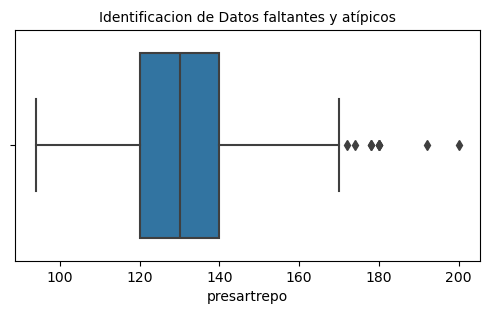

In [ ]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['presartrepo']) #Presion Arterial en Reposo //sistolica normal 80 - 120
plt.title('Identificacion de Datos faltantes y atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificacion de Datos faltantes y atípicos')

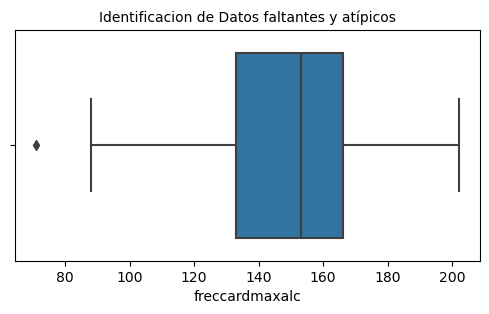

In [ ]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['freccardmaxalc']) #Frecuencia Cardiaca Maxima Alcanzada //sistolica normal 80 - 120
plt.title('Identificacion de Datos faltantes y atípicos', fontsize=10)

2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [ ]:
# Numero de datos atipicos
nivel_max_pres_art=180
nivel_mini_freccardmaxalc = 80
total_nivel_max_pres_art=((Datos['presartrepo']>=nivel_max_pres_art)).sum()
total_nivel_nivel_mini_freccardmaxalc=((Datos['freccardmaxalc']<nivel_mini_freccardmaxalc)).sum()
print("El total de datos atipicos de la presion arterial en reposo > 180 es de: {}".format(total_nivel_max_pres_art))
print("El total de datos atipicos de la frecuencia maxima alcanzada < 80 es de: {}".format(total_nivel_nivel_mini_freccardmaxalc))

El total de datos atipicos de la presion arterial en reposo > 180 es de: 5
El total de datos atipicos de la frecuencia maxima alcanzada < 80 es de: 1


In [ ]:
# Numero de registros con valor cero en variables que no deben tener valor 0
print("Cantidad de registros con cero en edad: ",Datos['edad'].isin([0]).sum())
print("Cantidad de registros con cero en colseri: ",Datos['colseri'].isin([0]).sum())
print("Cantidad de registros con cero en presartrepo: ",Datos['presartrepo'].isin([0]).sum())
print("Cantidad de registros con cero en freccardmaxalc: ",Datos['freccardmaxalc'].isin([0]).sum())

Cantidad de registros con cero en edad:  0
Cantidad de registros con cero en colseri:  0
Cantidad de registros con cero en presartrepo:  0
Cantidad de registros con cero en freccardmaxalc:  0


In [ ]:
Datos= Datos[(Datos['freccardmaxalc']>80)] # Filtro de valores atipicos para la frecuencia cardiaca maxima alcanzada

In [ ]:
nivel_max_pres_art=180
nivel_mini_freccardmaxalc = 80
total_nivel_max_pres_art=((Datos['presartrepo']>=nivel_max_pres_art)).sum()
total_nivel_nivel_mini_freccardmaxalc=((Datos['freccardmaxalc']<nivel_mini_freccardmaxalc)).sum()
print("El total de datos atipicos de la presion arterial en reposo > 180 es de: {}".format(total_nivel_max_pres_art))
print("El total de datos atipicos de la frecuencia maxima alcanzada < 80 es de: {}".format(total_nivel_nivel_mini_freccardmaxalc))

El total de datos atipicos de la presion arterial en reposo > 180 es de: 5
El total de datos atipicos de la frecuencia maxima alcanzada < 80 es de: 0


In [ ]:
Datos.info() # Se omitio el registro donde habia un valor atipico en la frecuencia cardiaca maxima alcanzada

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 296
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   edad            296 non-null    int64  
 1   sexo            296 non-null    int64  
 2   doltora         296 non-null    int64  
 3   presartrepo     296 non-null    int64  
 4   colseri         296 non-null    int64  
 5   glucayu         296 non-null    int64  
 6   reselectrorep   296 non-null    int64  
 7   freccardmaxalc  296 non-null    int64  
 8   angiejer        296 non-null    int64  
 9   oldpeak         296 non-null    float64
 10  pdteoldpeak     296 non-null    int64  
 11  ca              296 non-null    int64  
 12  thal            296 non-null    int64  
 13  condition       296 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.7 KB


3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
Característica de interes:
conditioico: si la persona tieenfermedad cardiacates o no (0 = no tieenfermedadtes - 1 = si tieenfermedadtes)
Predecir si una persona puede teenfermedad cardiacaetes

In [ ]:
Datos['condition'].value_counts() # El valor 0 indica que la persona no presenta enfermedad cardiaca, 1 indica que la persona tiene enfermedad cardiaca

condition
0    160
1    136
Name: count, dtype: int64

In [ ]:
Datos['condition'].head(10)

0    0
1    0
2    0
3    1
4    0
5    0
6    0
7    1
8    0
9    0
Name: condition, dtype: int64

4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [ ]:
X = Datos.drop('condition',axis=1)
Y = Datos['condition']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25, stratify= Y, random_state = 0 ) #Asignacion de 25% del total de datos para Test

In [ ]:
print(X_train)

     edad  sexo  doltora  presartrepo  colseri  glucayu  reselectrorep  \
262    51     1        3          140      299        0              0   
82     66     0        2          146      278        0              2   
36     56     1        1          120      240        0              0   
3      65     1        0          138      282        1              2   
168    66     1        3          112      212        0              2   
..    ...   ...      ...          ...      ...      ...            ...   
32     58     0        1          136      319        1              2   
239    55     1        3          140      217        0              0   
226    57     1        3          152      274        0              0   
135    46     0        2          142      177        0              2   
103    57     1        2          128      229        0              2   

     freccardmaxalc  angiejer  oldpeak  pdteoldpeak  ca  thal  
262             173         1      1.6         

In [ ]:
print(Y_train)

262    1
82     0
36     0
3      1
168    1
      ..
32     1
239    1
226    1
135    0
103    1
Name: condition, Length: 222, dtype: int64


5. Entrenar el modelo configurando los diferentes hiperparámetros

In [ ]:
modelo_regresion = LogisticRegression(solver = 'liblinear')
#modelo_regresion = LinearRegression() # Se usa para regresion lineal
modelo_regresion.fit(X_train,Y_train)
Prediccion = modelo_regresion.predict(X_test)

In [ ]:
print(Y_test)

111    0
264    1
162    1
170    1
285    0
      ..
278    0
213    1
137    0
279    1
11     1
Name: condition, Length: 74, dtype: int64


In [ ]:
print(Prediccion)

[1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0]


6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [ ]:
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        40
           1       0.87      0.79      0.83        34

    accuracy                           0.85        74
   macro avg       0.85      0.85      0.85        74
weighted avg       0.85      0.85      0.85        74



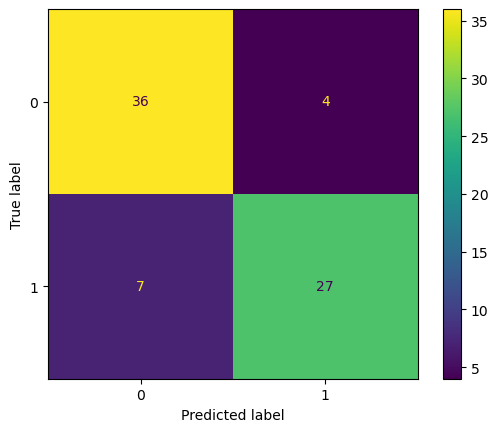

In [ ]:
#Matriz de Confusion
cm = confusion_matrix(Y_test,Prediccion)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

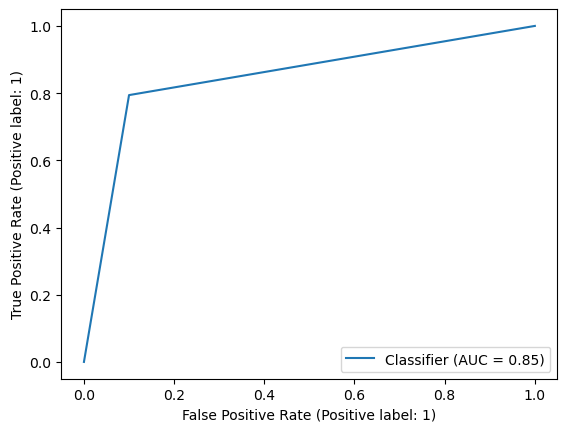

In [ ]:
#Curva ROC
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test,Prediccion)
plt.show()